In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sunvox import Slot, Process
from sunvox.buffered import int16, BufferedProcess

process = BufferedProcess(data_type=int16, size=44100 * 4)

from rv import modules as m, NOTE, Project

project = Project()

saws = [
    project.new_module(m.AnalogGenerator, volume=256, attack=150, release=242, sustain=False, 
                       waveform=m.AnalogGenerator.Waveform.saw, finetune=x * 7) 
    for x in range(-63, 64)
]
project.connect(saws, project.output)

multi = project.new_module(m.MultiSynth, random_phase=32768)
project.connect(multi, saws)

In [3]:
slot = Slot(project, process=process)
slot.volume(64)
slot.send_event(0, NOTE.C2, 32, multi, 0, process.get_ticks())
buf = process.fill_buffer()
buf_t = buf.transpose()
l, r = buf_t

In [4]:
from IPython.display import Audio

Audio(buf_t, rate=process.freq)

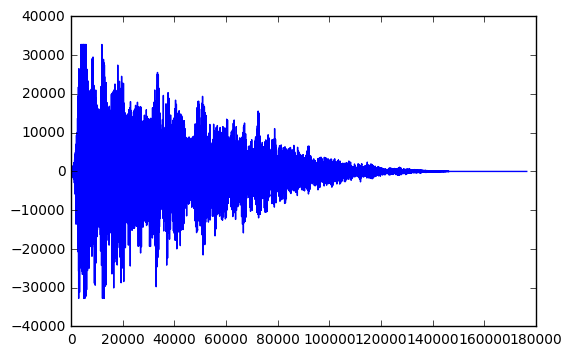

In [5]:
plt.plot(l)

/Users/matthew/.virtualenvs/svs/lib/python3.5/site-packages/matplotlib/axes/_axes.py:7017: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


(0, 20000)

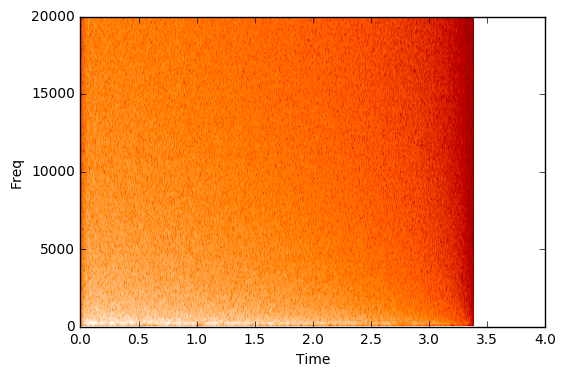

In [6]:
S, freqs, bins, im = plt.specgram(r, NFFT=512, Fs=process.freq, noverlap=500, cmap=plt.cm.gist_heat)
plt.xlabel('Time')
plt.ylabel('Freq')
plt.ylim(0, 20000)